# Customer Retention & Churn Analysis  
Future Interns –fine  Task 2  
Author: Arna Adhikari  
Tools: Python, Pandas, Seaborn


## Project Overview
We’re analyzing why customers leave a subscription service and how to keep them happy.  
The goal: find churn patterns and suggest ways to improve retention.


## Objectives
- Find overall churn rate  
- Spot customer segments most likely to leave  
- See when customers churn during their subscription  
- Calculate basic Customer Lifetime Value (CLV)  
- Give actionable recommendations to reduce churn


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

# Quick check
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import os
os.rename("WA_Fn-UseC_-Telco-Customer-Churn (1).csv", "churn.csv")

df = pd.read_csv("churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape       # Rows x Columns
df.info()      # Column types and missing values
df.describe()  # Summary stats for numeric columns
df.columns     # List all columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# 1️⃣ Drop customerID (not needed)
df.drop("customerID", axis=1, inplace=True)

# 2️⃣ Fix TotalCharges (sometimes it's object/string)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 3️⃣ Fill missing values in TotalCharges
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# 4️⃣ Convert Churn to numeric 0/1
df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

# 5️⃣ Check cleaned data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


/tmp/ipython-input-2035076110.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Churn Distribution
This chart shows how many customers stayed vs left.  
It gives a quick view of the overall churn rate in the business.


Overall Churn Rate: 26.54 %


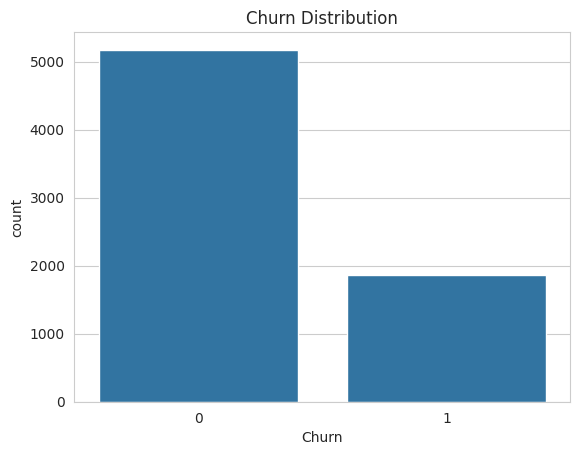

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Overall churn rate
churn_rate = df["Churn"].mean()
print("Overall Churn Rate:", round(churn_rate*100, 2), "%")

# Plot churn distribution
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


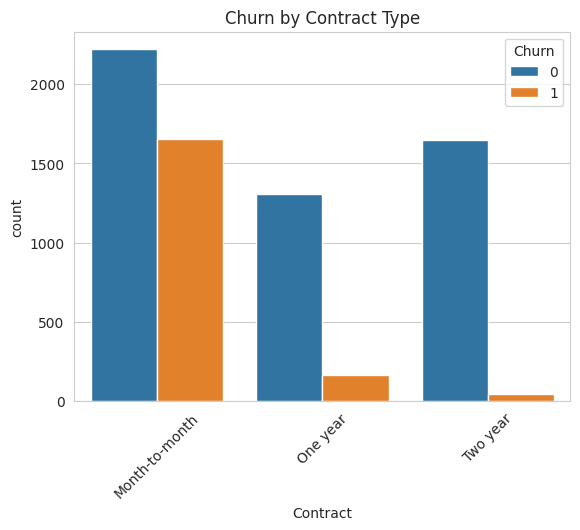

In [ ]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")

sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()


## Churn by Contract Type
This compares churn across different contract plans.  
It helps us see which subscription types are most likely to lose customers.


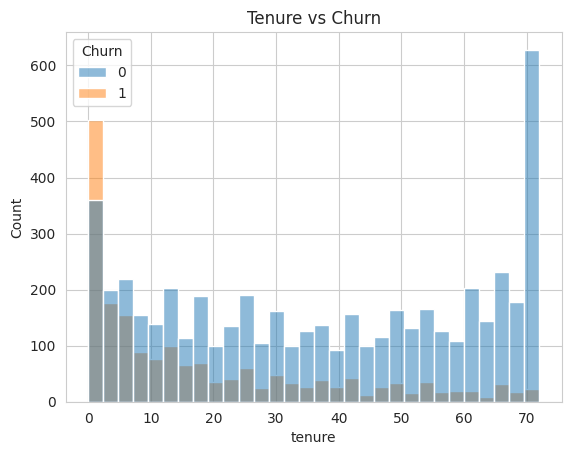

In [ ]:
sns.histplot(data=df, x="tenure", hue="Churn", bins=30)
plt.title("Tenure vs Churn")
plt.show()


## Churn by Tenure
This shows how long customers stay before leaving.  
It helps identify when churn happens most frequently.


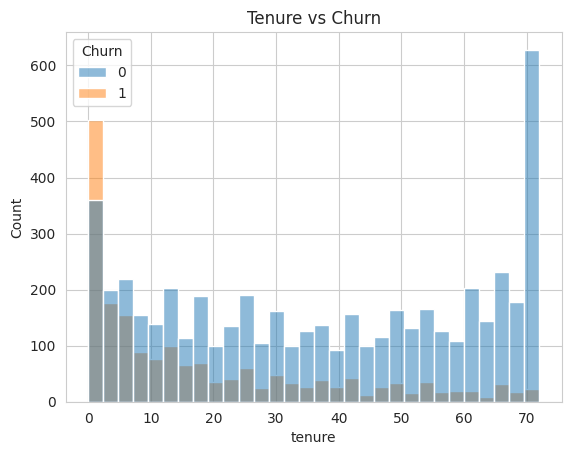

In [ ]:
sns.histplot(data=df, x="tenure", hue="Churn", bins=30)
plt.title("Tenure vs Churn")
plt.show()


## Monthly Charges vs Churn
This compares pricing between churned and retained customers.  
It helps us understand if higher prices increase churn risk.


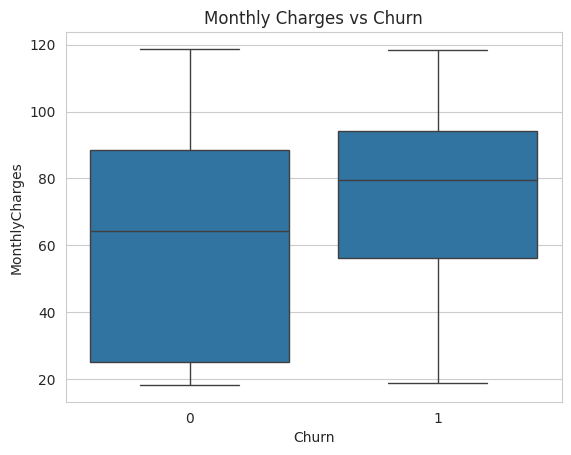

In [ ]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


## Retention by Tenure Group
Customers are grouped by how long they’ve stayed.  
This shows how retention improves as customers remain longer with the service.


In [ ]:
# Create tenure groups
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0,12,24,36,48,60,72],
    labels=["0-1yr","1-2yr","2-3yr","3-4yr","4-5yr","5-6yr"]
)

pd.crosstab(df["tenure_group"], df["Churn"], normalize="index")


Churn,0,1
tenure_group,,
0-1yr,0.523218,0.476782
1-2yr,0.712891,0.287109
2-3yr,0.783654,0.216346
3-4yr,0.809711,0.190289
4-5yr,0.855769,0.144231
5-6yr,0.933902,0.066098


## Customer Lifetime Value
This compares total revenue from churned vs retained customers.  
It shows the financial impact of losing customers early.


In [ ]:
df["CLV"] = df["MonthlyCharges"] * df["tenure"]

df.groupby("Churn")["CLV"].mean()


,CLV
Churn,
0,2549.770883
1,1531.608828


## Key Insights

• Month-to-month customers churn the most  
• New customers churn early in the first year  
• Higher monthly charges increase churn risk  
• Long-term customers generate higher lifetime value  

## Recommendations

• Offer discounts for yearly contracts  
• Improve onboarding in first 3 months  
• Provide loyalty rewards  
• Target high-risk users with retention campaigns


## Key Performance Indicators (KPIs)
Quick summary metrics to understand customer retention and revenue health.


In [ ]:
# ===== KPI Calculations =====

total_customers = len(df)
churn_rate = df["Churn"].mean() * 100
avg_tenure = df["tenure"].mean()
avg_monthly = df["MonthlyCharges"].mean()
avg_clv = (df["MonthlyCharges"] * df["tenure"]).mean()

print("Total Customers:", total_customers)
print("Churn Rate:", round(churn_rate, 2), "%")
print("Average Tenure:", round(avg_tenure, 1), "months")
print("Average Monthly Charges: $", round(avg_monthly, 2))
print("Average Customer Lifetime Value (CLV): $", round(avg_clv, 2))


Total Customers: 7043
Churn Rate: 26.54 %
Average Tenure: 32.4 months
Average Monthly Charges: $ 64.76
Average Customer Lifetime Value (CLV): $ 2279.58


In [ ]:
import pandas as pd

kpis = pd.DataFrame({
    "Metric": ["Total Customers", "Churn Rate (%)", "Avg Tenure (months)", "Avg Monthly Charges ($)", "Avg CLV ($)"],
    "Value": [
        total_customers,
        round(churn_rate,2),
        round(avg_tenure,1),
        round(avg_monthly,2),
        round(avg_clv,2)
    ]
})

kpis


,Metric,Value
0,Total Customers,7043.00
1,Churn Rate (%),26.54
2,Avg Tenure (months),32.40
3,Avg Monthly Charges ($),64.76
4,Avg CLV ($),2279.58


These KPIs provide a quick snapshot of customer health, retention, and revenue impact before diving into deeper analysis.
